
## Display the number of crimes
` select description, count(*) from kccrime group by description; `

## show how many people are involving according to their gender in 206 and 2018
` select Reported_year, Sex, count(*) from kccrime where Sex RLIKE 'M|F|U' and Reported_year RLIKE '2018|2016' group by Reported_year, Sex; `

## Print the number of arrested people in the Plaza Area in 2018
` select Reported_year, Sex, Involvement, count(*), Zip_Code from kccrime where Sex RLIKE 'M|F|U' and Reported_year = '2018' and Involvement = 'ARR' and Zip_Code = '64112' group by Reported_year, Sex, Involvement, Zip_Code; `

## in order to know the number of victims in the year of 2016, we used the following query.
` select Reported_year, Sex, Involvement, count(*) from kccrime where Sex RLIKE 'M|F|U' and Reported_year = '2016' and Involvement = 'VIC' group by Reported_year, Sex, Involvement; `

## show the race of people who were suspect
` select Race, count(*), Involvement from kccrime where Race RLIKE 'B|I|W' and Involvement = 'SUS' group by Race, Involvement; `

` select Sex, count(*) from kccrime  group by Sex; `

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
def clean_dataset(df):
    expected_columns = {
        'Reported Time': 'Reported_Time',
        'From Time': 'From_Time',
        'Zip Code': 'Zip_Code'
    }

    for old_name, new_name in expected_columns.items():
        if old_name in df.columns:
            df.rename(columns={old_name: new_name}, inplace=True)

    if 'Firearm Used Flag' in df.columns:
        df.rename(columns={'Firearm Used Flag': 'Firearm_Used_Flag'}, inplace=True)
    elif 'Fire Arm Used Flag' in df.columns:
        df.rename(columns={'Fire Arm Used Flag': 'Firearm_Used_Flag'}, inplace=True)

    df.drop(['Beat'], axis=1, errors='ignore', inplace=True)

    return df[['Report_No', 'Reported_Date', 'Reported_Time', 'From_Date', 'From_Time',
                'Offense', 'IBRS', 'Description', 'Address', 'City',
                'Zip_Code', 'Location', 'Rep_Dist', 'Area', 'DVFlag',
                'Involvement', 'Race', 'Sex', 'Age', 'Firearm_Used_Flag']]


In [ ]:
def process_and_merge_datasets(file_paths):
    cleaned_datasets = [clean_dataset(pd.read_csv(file, low_memory=False)) for file in file_paths]
    KCDPFinal = pd.concat(cleaned_datasets, ignore_index=True, join="inner")

    KCDPFinal['City'] = 'KANSAS CITY'
    KCDPFinal['Sex'] = KCDPFinal['Sex'].fillna('U')
    KCDPFinal['Race'] = KCDPFinal['Race'].fillna('U')
    KCDPFinal['Age'] = KCDPFinal['Age'].fillna(round(KCDPFinal['Age'].mean()))

    essential_columns = ['IBRS', 'Rep_Dist', 'From_Time', 'From_Date', 'Area', 'Zip_Code']
    for col in essential_columns:
        KCDPFinal = KCDPFinal[KCDPFinal[col].notnull()]

    print("\nDisplay the null values in each feature\n")
    KCDPNulls = pd.DataFrame(KCDPFinal.isnull().sum().sort_values(ascending=False)[:25])
    KCDPNulls.columns = ['Null-Values-Count']
    KCDPNulls.index.name = 'Features'
    print(KCDPNulls)

    KCDPFinal['Reported_year'] = pd.DatetimeIndex(KCDPFinal['Reported_Date']).year
    KCDPFinal['Reported_month'] = pd.DatetimeIndex(KCDPFinal['Reported_Date']).month
    KCDPFinal['Reported_day'] = pd.DatetimeIndex(KCDPFinal['Reported_Date']).day

    KCDPFinal['From_year'] = pd.DatetimeIndex(KCDPFinal['From_Date']).year
    KCDPFinal['From_month'] = pd.DatetimeIndex(KCDPFinal['From_Date']).month
    KCDPFinal['From_day'] = pd.DatetimeIndex(KCDPFinal['From_Date']).day

    KCDPFinal.drop(['Reported_Date', 'From_Date'], axis=1, inplace=True)

    KCDPFinal[['Reported_hour', 'Reported_minute']] = KCDPFinal['Reported_Time'].astype(str).str.split(":", expand=True)
    KCDPFinal[['From_hour', 'From_minute']] = KCDPFinal['From_Time'].astype(str).str.split(":", expand=True)

    KCDPFinal = KCDPFinal[(KCDPFinal['Reported_year'] >= 2020) & (KCDPFinal['Reported_year'] <= 2024)]
    KCDPFinal.reset_index(drop=True, inplace=True)

    KCDPFinal = KCDPFinal[['Report_No', 'Reported_year', 'Reported_month', 'Reported_day',
                           'Reported_hour', 'Reported_minute', 'From_year',
                           'From_month', 'From_day', 'From_hour', 'From_minute',
                           'Offense', 'IBRS', 'Description', 'Location', 'Address',
                           'City', 'Zip_Code', 'Rep_Dist', 'Area', 'DVFlag',
                           'Involvement', 'Race', 'Sex', 'Age',
                           'Firearm_Used_Flag']]

    print("The number of columns and rows after cleaning:")
    print(KCDPFinal.shape)

    KCDPFinal.to_csv('/content/2020to2024_data.csv', index=None, header=True)
    print("Saving the file... Done.")


In [ ]:

# Specify the file paths
file_paths = ["/content/drive/MyDrive/Big_data_crime/D0_2020.csv","/content/drive/MyDrive/Big_data_crime/D1_2021.csv", "/content/drive/MyDrive/Big_data_crime/D2_2022.csv", "/content/drive/MyDrive/Big_data_crime/D3_2023.csv", "/content/drive/MyDrive/Big_data_crime/D4_2024.csv"]

# Process and merge the datasets
process_and_merge_datasets(file_paths)


Display the null values in each feature

                   Null-Values-Count
Features                            
Location                       26262
Report_No                          0
Reported_Date                      0
Age                                0
Sex                                0
Race                               0
Involvement                        0
DVFlag                             0
Area                               0
Rep_Dist                           0
Zip_Code                           0
City                               0
Address                            0
Description                        0
IBRS                               0
Offense                            0
From_Time                          0
From_Date                          0
Reported_Time                      0
Firearm_Used_Flag                  0
The number of columns and rows after cleaning:
(355481, 26)
Saving the file... Done.


In [ ]:
def merge_csv_files(file_paths, output_file):
    # Read and concatenate all CSV files
    combined_data = pd.concat((pd.read_csv(file) for file in file_paths), ignore_index=True)

    # Save the merged DataFrame to a new CSV file
    combined_data.to_csv(output_file, index=False)
    print(f"Merged file saved as: {output_file}")
normal_merge = merge_csv_files(file_paths, '/content/WoPre2020to2024_data.csv')

<ipython-input-5-26a376ccb60f>:3: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_data = pd.concat((pd.read_csv(file) for file in file_paths), ignore_index=True)
<ipython-input-5-26a376ccb60f>:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_data = pd.concat((pd.read_csv(file) for file in file_paths), ignore_index=True)


Merged file saved as: /content/WoPre2020to2024_data.csv


In [ ]:
normal_merge = pd.read_csv('/content/WoPre2020to2024_data.csv')


<ipython-input-6-da24826d3935>:1: DtypeWarning: Columns (2,4,6,10,13,16,21,23,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  normal_merge = pd.read_csv('/content/WoPre2020to2024_data.csv')


In [ ]:
df = pd.read_csv('/content/2020to2024_data.csv')
df.head()

<ipython-input-7-17e6aef11817>:1: DtypeWarning: Columns (17,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/2020to2024_data.csv')


,Report_No,Reported_year,Reported_month,Reported_day,Reported_hour,Reported_minute,From_year,From_month,From_day,From_hour,...,City,Zip_Code,Rep_Dist,Area,DVFlag,Involvement,Race,Sex,Age,Firearm_Used_Flag
0,KC20017500,2020,3,8,19,24,2020,3,8,19,...,KANSAS CITY,64133.0,PJ3601,EPD,N,VIC,U,U,38.0,False
1,KC20009823,2020,2,7,18,30,2020,2,7,18,...,KANSAS CITY,64134.0,PJ6554,SPD,N,SUS,B,M,38.0,True
2,KC20011191,2020,2,13,12,15,2020,2,13,12,...,KANSAS CITY,64133.0,PJ3601,EPD,N,ARR CHA SUS,B,M,37.0,False
3,KC20002142,2020,1,9,11,29,2020,1,8,13,...,KANSAS CITY,64151.0,PP0447,NPD,N,CMP VIC,W,M,54.0,False
4,KC20006296,2020,1,26,9,48,2020,1,26,9,...,KANSAS CITY,64133.0,PJ3601,EPD,N,VIC,U,U,38.0,False


In [ ]:
print(normal_merge.size)
print(normal_merge.info())
# print(normal_merge.describe())

13664644
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488023 entries, 0 to 488022
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Report_No           488023 non-null  object 
 1   Reported_Date       488023 non-null  object 
 2   Reported Time       96220 non-null   object 
 3   From_Date           488017 non-null  object 
 4   From Time           96219 non-null   object 
 5   To_Date             230928 non-null  object 
 6   To Time             32101 non-null   object 
 7   Offense             488023 non-null  object 
 8   IBRS                442699 non-null  object 
 9   Description         442699 non-null  object 
 10  Beat                488006 non-null  object 
 11  Address             488023 non-null  object 
 12  City                488020 non-null  object 
 13  Zip Code            455154 non-null  object 
 14  Rep_Dist            403560 non-null  object 
 15  Area                48801

In [ ]:
print(df.size)
print(df.info())
# print(df.describe())

9242506
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355481 entries, 0 to 355480
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Report_No          355481 non-null  object 
 1   Reported_year      355481 non-null  int64  
 2   Reported_month     355481 non-null  int64  
 3   Reported_day       355481 non-null  int64  
 4   Reported_hour      355481 non-null  int64  
 5   Reported_minute    355481 non-null  int64  
 6   From_year          355481 non-null  int64  
 7   From_month         355481 non-null  int64  
 8   From_day           355481 non-null  int64  
 9   From_hour          355481 non-null  int64  
 10  From_minute        355481 non-null  int64  
 11  Offense            355481 non-null  object 
 12  IBRS               355481 non-null  object 
 13  Description        355481 non-null  object 
 14  Location           329219 non-null  object 
 15  Address            355481 non-null  object 

# Crime Data Analysis

## 1. Crime Trends Over Time
**Purpose**: Analyze how the number of reported crimes has changed over the years.  
**Query**:
```sql
SELECT Reported_year, COUNT(*) AS total_crimes
FROM kccrime
GROUP BY Reported_year
ORDER BY Reported_year;


In [ ]:
color = [ 'orange', 'yellow','red', 'green', 'blue']

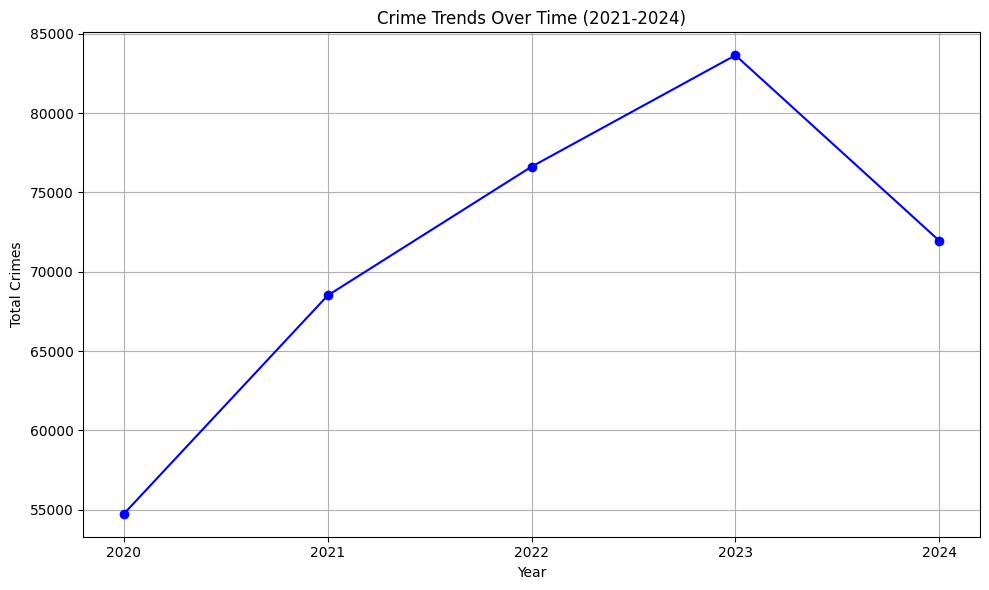

In [ ]:
# data = df[df['Reported_year']>2020]
crime_trends = df.groupby('Reported_year').size().reset_index(name='total_crimes')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(crime_trends['Reported_year'], crime_trends['total_crimes'], marker='o', color='b')
plt.title('Crime Trends Over Time (2021-2024)')
plt.xlabel('Year')
plt.ylabel('Total Crimes')
plt.xticks(crime_trends['Reported_year'])
plt.grid()
plt.tight_layout()
plt.show()


---

## 2. Monthly Crime Distribution
**Purpose**: Examine the number of crimes reported each month to identify seasonal patterns.  
**Query**:
```sql
SELECT Reported_month, COUNT(*) AS total_crimes
FROM kccrime
GROUP BY Reported_month
ORDER BY Reported_month;
```
**Insight**: Highlights months with higher crime rates, potentially correlating with holidays or events.

---

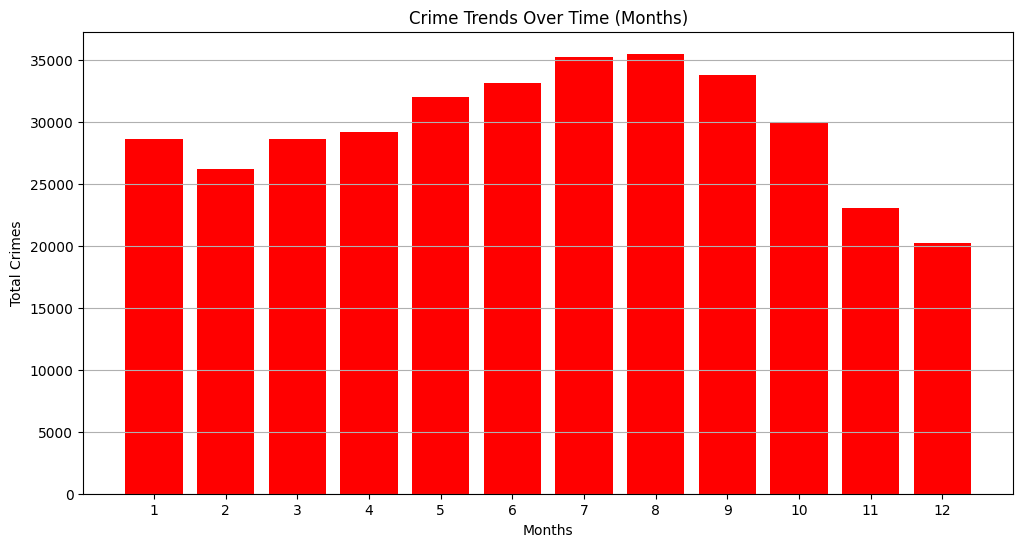

In [ ]:

crime_trends = df.groupby('Reported_month').size().reset_index(name='total_crimes')

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(crime_trends['Reported_month'], crime_trends['total_crimes'], color='r')
plt.title('Crime Trends Over Time (Months)')
plt.xlabel('Months')
plt.ylabel('Total Crimes')
plt.xticks(crime_trends['Reported_month'])
plt.grid(axis='y')
plt.show()



## 3. Offense Type Analysis
**Purpose**: Identify the most common offenses and their corresponding demographics.  
**Query**:
```sql
SELECT Offense, COUNT(*) AS offense_count, AVG(Age) AS average_age
FROM kccrime
GROUP BY Offense
ORDER BY offense_count DESC;
```
**Insight**: Provides a breakdown of offenses by frequency and average age of those involved.

---


In [ ]:
offense_data = df.groupby('Offense').agg(offense_count=('Offense', 'size')).reset_index()
offense_data = offense_data.sort_values(by='offense_count', ascending=False)
print(offense_data.size)
print(offense_data)
off_gt_150 = offense_data[offense_data['offense_count']>150]
print(off_gt_150)


310
                                        Offense  offense_count
129                                 Stolen Auto          36391
28   Domestic Violence Assault (Non-Aggravated)          29947
92                              Property Damage          26304
7                          Assault (Aggravated)          25083
122        Stealing from Auto (Theft from Auto)          23764
..                                          ...            ...
130                                     Suicide              1
22                          Confiscated Firearm              1
85     Possession of Gambling Device or Records              1
15                                   Buy Report              1
2                 Adult Entertainment Violation              1

[155 rows x 2 columns]
                                        Offense  offense_count
129                                 Stolen Auto          36391
28   Domestic Violence Assault (Non-Aggravated)          29947
92                         

                                         Offense  offense_count
129                                  Stolen Auto          36391
28    Domestic Violence Assault (Non-Aggravated)          29947
92                               Property Damage          26304
7                           Assault (Aggravated)          25083
122         Stealing from Auto (Theft from Auto)          23764
9                       Assault (Non-Aggravated)          20394
120                          Stealing - Shoplift          18024
139                    Trespass of Real Property          14133
121  Stealing from Auto (Auto Part or Accessory)          10560
27        Domestic Violence Assault (Aggravated)          10108


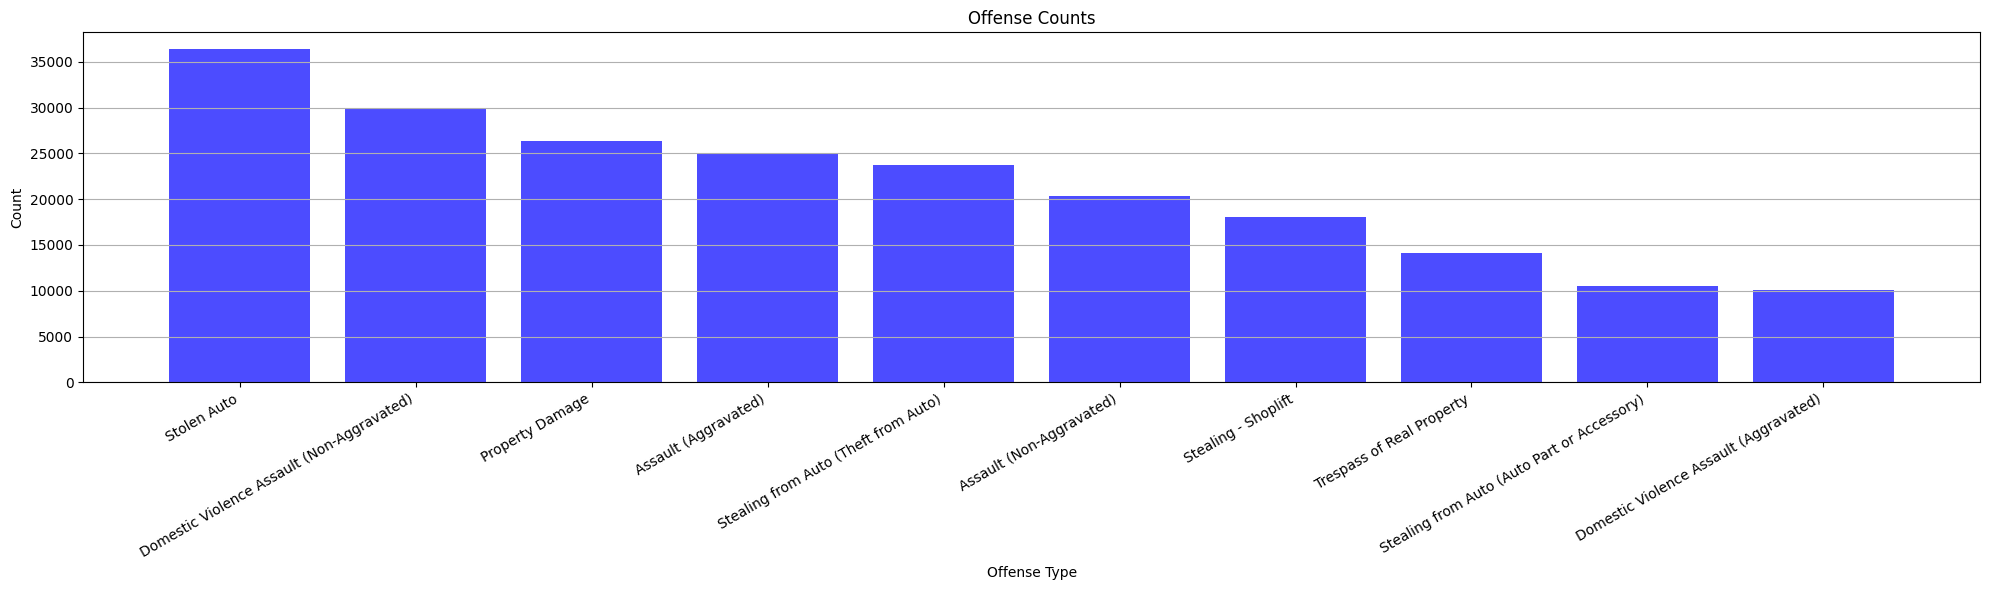

In [ ]:
off_top_10 = offense_data.head(10)
print(off_top_10)

plt.figure(figsize=(20, 6))
plt.bar(off_top_10['Offense'], off_top_10['offense_count'], color='b', alpha=0.7)
plt.title('Offense Counts')
plt.xlabel('Offense Type')
plt.ylabel('Count')
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## 4. Gender and Age Analysis
**Purpose**: Analyze how age varies by gender among those involved in crimes.  
**Query**:
```sql
SELECT Sex, AVG(Age) AS average_age
FROM kccrime
WHERE Age IS NOT NULL
GROUP BY Sex;
```
**Insight**: Reveals trends in age distribution among different genders, aiding in community program tailoring.

---

Counts of offenses by age range, along with a breakdown of male and female offenders

<ipython-input-15-920e3e291f56>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender_counts = df.groupby(['Age Range', 'Sex']).size().unstack(fill_value=0)


Sex            F      M      U
Age Range                     
10-20       3969   4696     37
20-30      33411  39736    160
30-40      44793  73242  51434
40-50      18697  28224     60
50-60      11487  19442     30
60-70       6862  11332     20
70-80       2673   3363      4


<Figure size 1000x600 with 0 Axes>

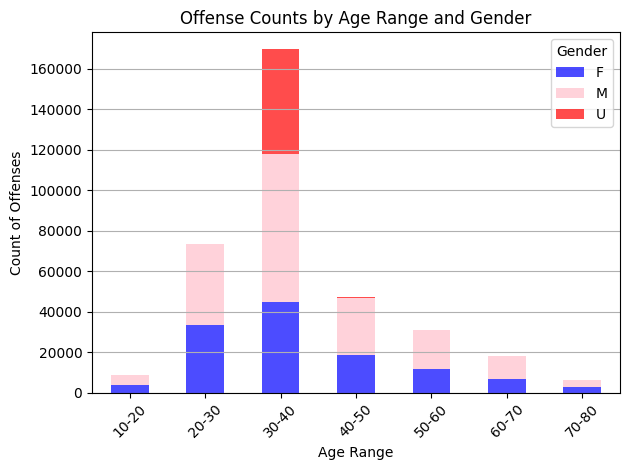

In [ ]:
bins = [10, 20, 30, 40, 50, 60, 70, 80]
labels = ['10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80']

# Create a new column for age ranges
df['Age Range'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Count offenses in each age range by gender
age_gender_counts = df.groupby(['Age Range', 'Sex']).size().unstack(fill_value=0)

print(age_gender_counts)

# Plotting
plt.figure(figsize=(10, 6))
age_gender_counts.plot(kind='bar', stacked=True, color=['blue', 'pink','red'], alpha=0.7)
plt.title('Offense Counts by Age Range and Gender')
plt.xlabel('Age Range')
plt.ylabel('Count of Offenses')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## 5. Impact of Firearms
**Purpose**: Assess how many crimes involved firearms and their relation to demographics.  
**Query**:
```sql
SELECT Firearm_Used_Flag, COUNT(*) AS total_crimes
FROM kccrime
GROUP BY Firearm_Used_Flag;
```
**Insight**: Understanding firearm involvement can guide policy and law enforcement strategies.

---

In [ ]:
def pie_fire_arm(data,message):
  plt.figure(figsize=(8, 8))
  plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90, colors=color)
  plt.title(message)
  plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
  plt.show()

Firearm_Used_Flag
False    321911
True      33570
Name: count, dtype: int64


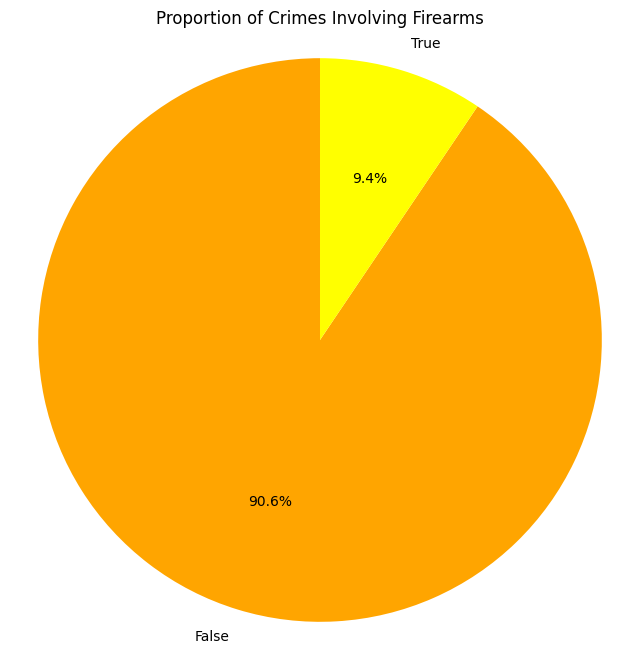

In [ ]:

print(df['Firearm_Used_Flag'].value_counts())

firearm_counts = df['Firearm_Used_Flag'].value_counts()


pie_fire_arm(firearm_counts,'Proportion of Crimes Involving Firearms')

Sex
M    21740
F    10502
U     1328
Name: count, dtype: int64



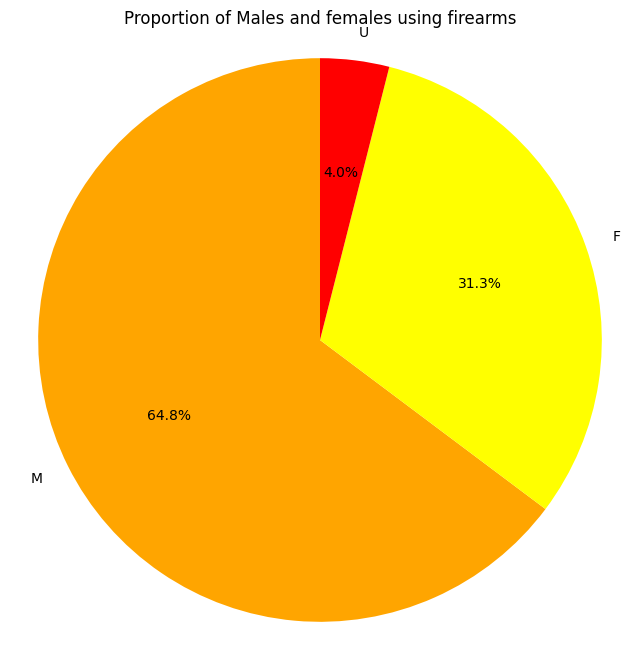

In [ ]:
gen_firearm_used = df[df['Firearm_Used_Flag']== 1]['Sex'].value_counts()
# print(df[df['Firearm_Used_Flag']== 1]['Sex'].value_counts())
print(gen_firearm_used)
print()
pie_fire_arm(df[df['Firearm_Used_Flag']== 1]['Sex'].value_counts(),"Proportion of Males and females using firearms")


In [ ]:
print(df[df['Firearm_Used_Flag']== 0]['Sex'].value_counts())
print()

Sex
M    159124
F    112361
U     50426
Name: count, dtype: int64







## 6. Crime Distribution by Area
**Purpose**: Analyze crime occurrence by geographical area or ZIP code.  
**Query**:
```sql
SELECT Zip_Code, COUNT(*) AS total_crimes
FROM kccrime
GROUP BY Zip_Code
ORDER BY total_crimes DESC;
```
**Insight**: Identifies high-crime areas, informing police patrols and community safety initiatives.

---


In [ ]:
crime_data = df.groupby('Zip_Code').size().reset_index(name='total_crimes')

# Sort by total_crimes in descending order
crime_data = crime_data.sort_values(by='total_crimes', ascending=False)
crime_data = crime_data.head(10)
print(crime_data)

   Zip_Code  total_crimes
40  64111.0         22061
59  64130.0         18998
56  64127.0         16785
37  64108.0         15353
61  64132.0         14483
57  64128.0         13275
62  64133.0         12700
35  64106.0         12464
60  64131.0         11617
63  64134.0         10875


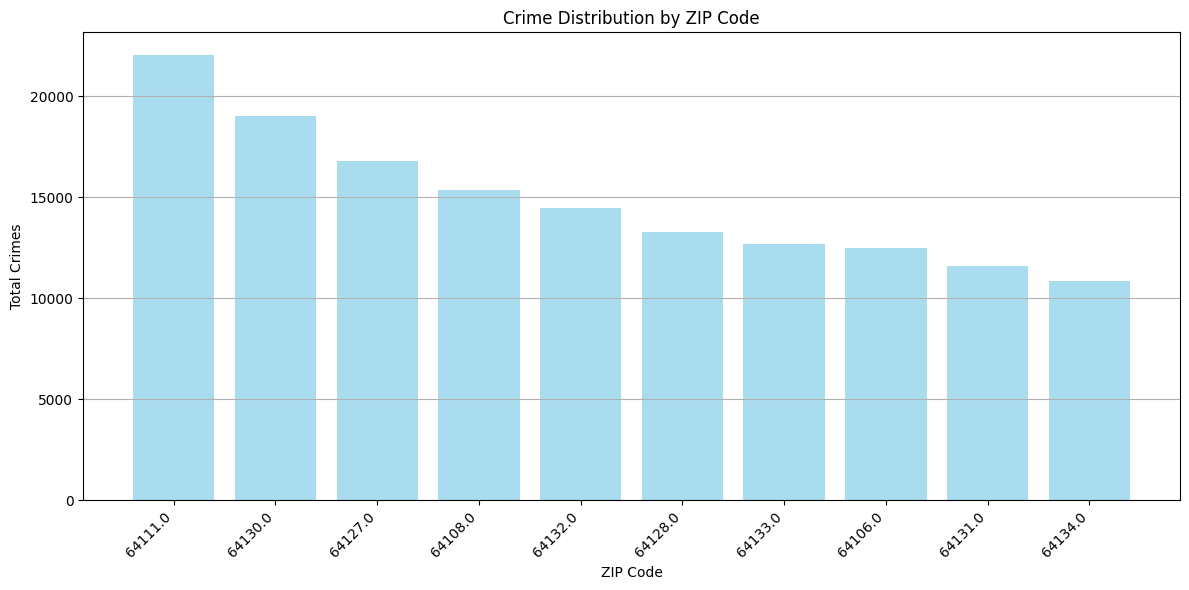

In [ ]:
# Plotting using indices for x-values
plt.figure(figsize=(12, 6))
plt.bar(range(len(crime_data)), crime_data['total_crimes'], color='skyblue', alpha=0.7)
plt.title('Crime Distribution by ZIP Code')
plt.xlabel('ZIP Code')
plt.ylabel('Total Crimes')
plt.xticks(range(len(crime_data)), crime_data['Zip_Code'], rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()



## 7. Domestic Violence Analysis
**Purpose**: Examine the prevalence of domestic violence incidents.  
**Query**:
```sql
SELECT COUNT(*) AS domestic_violence_cases
FROM kccrime
WHERE DVFlag = 'True';
```
**Insight**: Understanding domestic violence scope helps allocate resources for victim support.

---

In [ ]:
df['DVFlag'] = df['DVFlag'].astype(str)

# Filter for domestic violence cases
domestic_violence_cases = df[df['DVFlag'] == 'True'].shape[0]
print("Total domestic violence cases:", domestic_violence_cases)


Total domestic violence cases: 25081


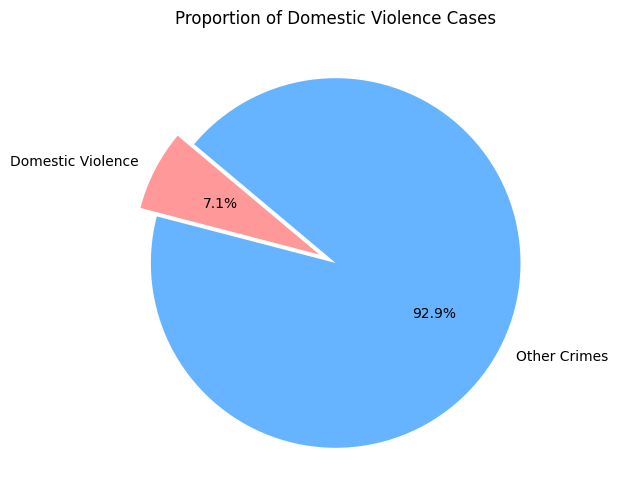

In [ ]:
labels = ['Domestic Violence', 'Other Crimes']
sizes = [domestic_violence_cases, len(df) - domestic_violence_cases]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title('Proportion of Domestic Violence Cases')
plt.show()


## 8. Arrest Rates by Offense Type
**Purpose**: Determine arrest rates for different types of offenses.  
**Query**:
```sql
SELECT Offense, COUNT(*) AS total_arrests
FROM kccrime
WHERE Involvement = 'ARR'
GROUP BY Offense
ORDER BY total_arrests DESC;
```
**Insight**: Assesses which offenses frequently lead to arrests, informing law enforcement strategies.

---

In [ ]:
arrest_data = df[df['Involvement'] == 'ARR']
# Group by Offense and count total arrests
arrest_counts = arrest_data.groupby('Offense').size().reset_index(name='total_arrests')
# Sort the data by total arrests in descending order
arrest_counts = arrest_counts.sort_values(by='total_arrests', ascending=False)
print(arrest_counts)


                                              Offense  total_arrests
21                                        Stolen Auto             14
10                      Possession of Stolen Property              5
0                                Assault (Aggravated)              3
12                                    Property Damage              3
22                          Trespass of Real Property              3
5                       City/Municipal Warrant Arrest              2
3                                Burning or Exploding              2
20                                Stealing – Shoplift              2
19               Stealing from Auto (Theft from Auto)              2
15                               State Warrant Arrest              2
6   Felon/Prohibited Person in Possession of a Fir...              2
14                                 Robbery (Business)              2
1                          Burglary (Non-Residential)              1
13                              Re

<ipython-input-25-96a92e974fa4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Offense', x='total_arrests', data=arrest_counts, palette='viridis')


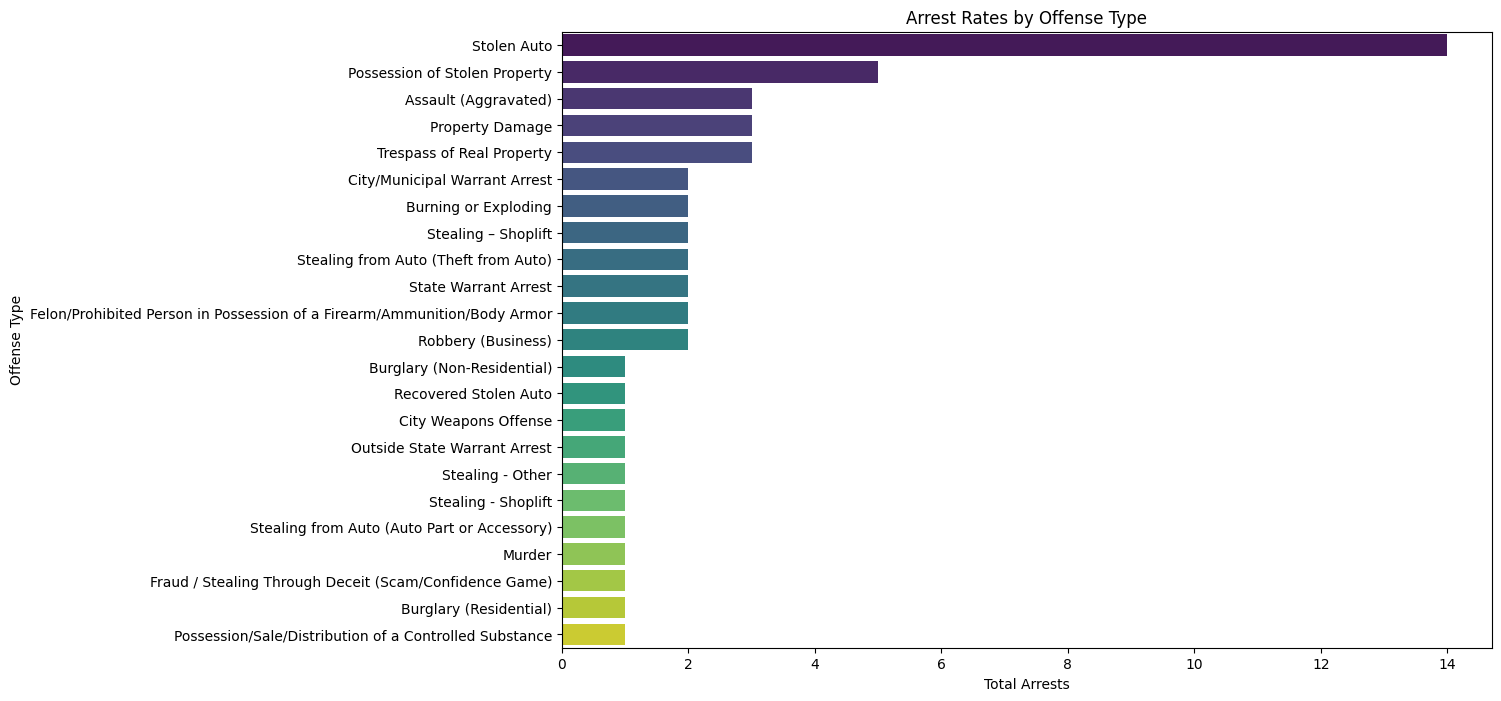

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(y='Offense', x='total_arrests', data=arrest_counts, palette='viridis')
plt.title('Arrest Rates by Offense Type')
plt.xlabel('Total Arrests')
plt.ylabel('Offense Type')
plt.show()


## 9. Victim Demographics by Offense Type
**Purpose**: Analyze demographics of victims for different types of offenses.  
**Query**:
```sql
SELECT Offense, Sex, COUNT(*) AS victim_count
FROM kccrime
WHERE Involvement = 'VIC'
GROUP BY Offense, Sex;
```
**Insight**: Aids in designing support programs and interventions based on victim demographics.

---


In [ ]:
# Filter for victim involvement
victim_data_raw = df[df['Involvement'] == 'VIC']
# Group by Offense and Sex, counting the number of victims
victim_counts_raw = victim_data_raw.groupby(['Offense', 'Sex']).size().reset_index(name='victim_count')
print(victim_counts_raw)
victim_counts = victim_counts_raw[victim_counts_raw['victim_count'] > 35]
print(victim_counts)

                                       Offense Sex  victim_count
0                       Abandonment of a Child   F            13
1                       Abandonment of a Child   M            10
2                             Abuse of a Child   F           691
3                             Abuse of a Child   M           710
4                             Abuse of a Child   U             9
..                                         ...  ..           ...
356  Violation of Ex-Parte Order of Protection   F           534
357  Violation of Ex-Parte Order of Protection   M           150
358  Violation of Ex-Parte Order of Protection   U             3
359      Violation of Full Order of Protection   F           682
360      Violation of Full Order of Protection   M           184

[361 rows x 3 columns]
                                       Offense Sex  victim_count
2                             Abuse of a Child   F           691
3                             Abuse of a Child   M           710
7

In [ ]:
unique_offenses = victim_counts['Offense'].nunique()
unique_sexes = victim_counts['Sex'].nunique()
print(f"Unique Offenses: {unique_offenses}")

Unique Offenses: 82


In [ ]:
# You might define your own categories based on the offense types available
def categorize_offense(offense):
    if offense in ['Assault', 'Battery']:
        return 'Violent Offenses'
    elif offense in ['Theft', 'Burglary']:
        return 'Property Crimes'
    else:
        return 'Other'
victim_counts['Offense_Category'] = victim_counts['Offense'].apply(categorize_offense)
# Re-grouping by the new offense categories
aggregated_counts = victim_counts.groupby(['Offense_Category', 'Sex']).sum().reset_index()


<ipython-input-28-ac686e290bf7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  victim_counts['Offense_Category'] = victim_counts['Offense'].apply(categorize_offense)


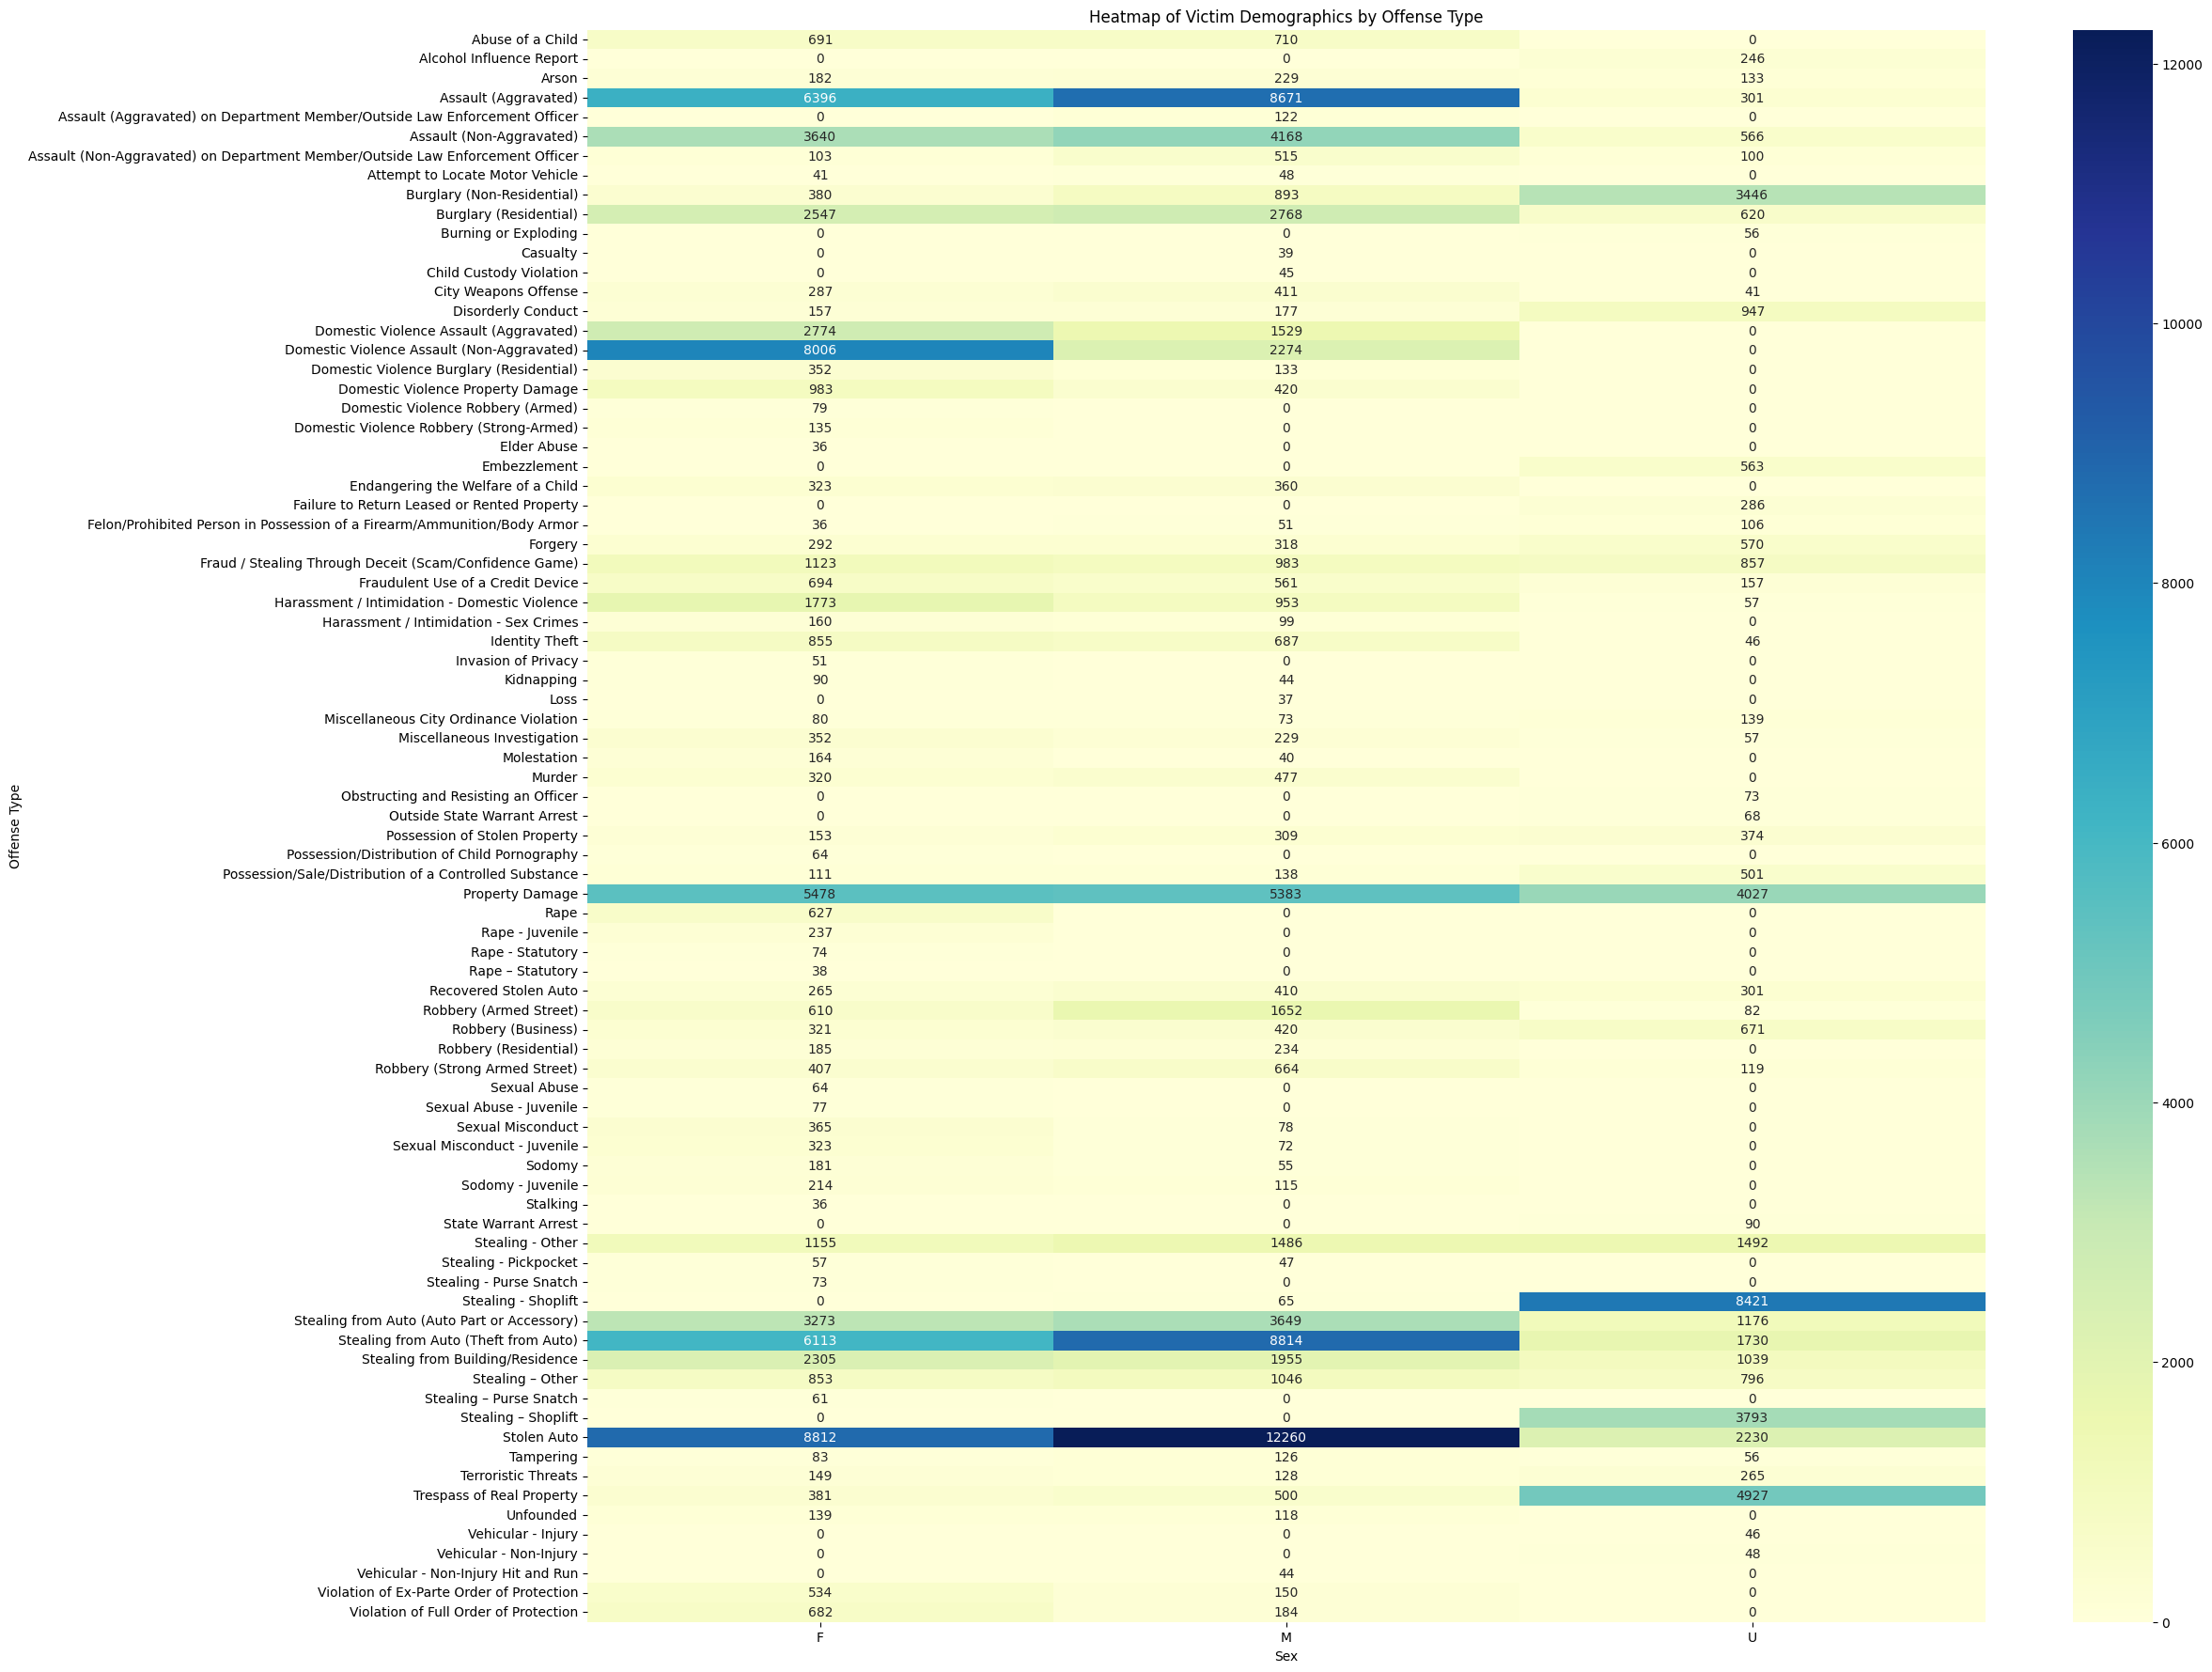

In [ ]:
heatmap_data = victim_counts.pivot(index='Offense', columns='Sex', values='victim_count').fillna(0)
# Create the heatmap
plt.figure(figsize=(24, 22))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Heatmap of Victim Demographics by Offense Type')
plt.xlabel('Sex')
plt.ylabel('Offense Type')
plt.show()


## 10. Repeat Offenders
**Purpose**: Identify if certain Areas where repeat offenders.  
**Query**:
```sql
SELECT Area, COUNT(*) AS offense_count
FROM kccrime
GROUP BY Area
HAVING COUNT(*) > 1;
```
**Insight**: Identifying repeat offended areas can help in targeted rehabilitation and preventive measures.
```

Repeat Offenders:
   Area  offense_count
0   CPD          98698
1   EPD          89681
2   MPD          70285
3   NPD          30292
4  OSPD            117
5   SCP          28813
6   SPD          37595


<ipython-input-30-24e53ed5790e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=repeat_offenders, x='Area', y='offense_count', palette='viridis')


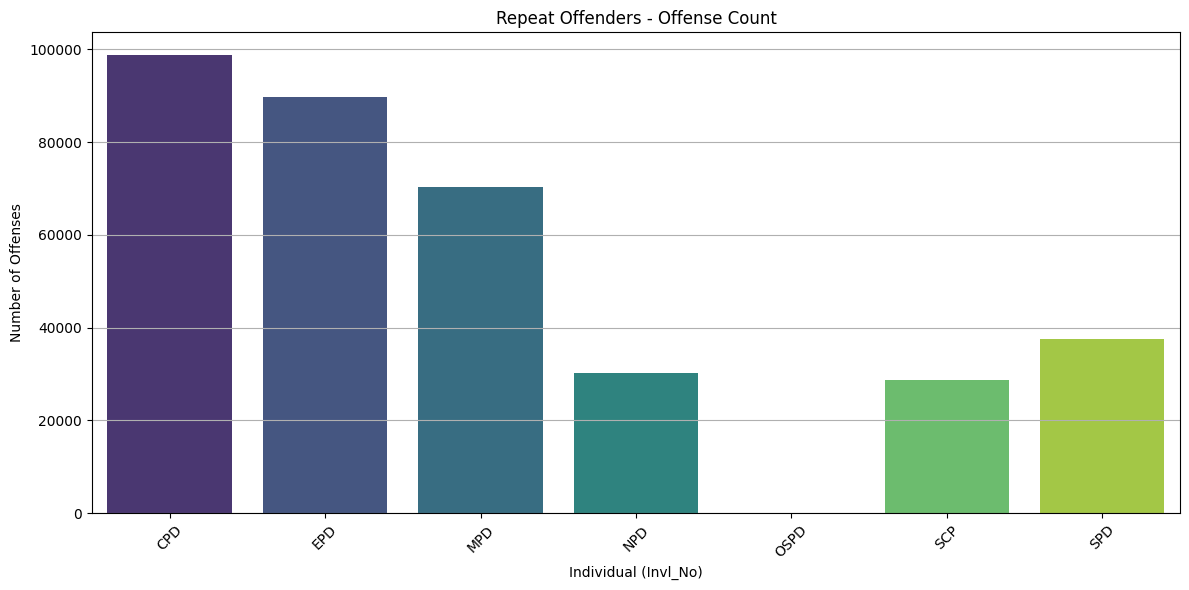

In [ ]:
repeat_offenders = df.groupby('Area').size().reset_index(name='offense_count')
repeat_offenders = repeat_offenders[repeat_offenders['offense_count'] > 1]

print("Repeat Offenders:")
print(repeat_offenders)

plt.figure(figsize=(12, 6))
sns.barplot(data=repeat_offenders, x='Area', y='offense_count', palette='viridis')
plt.title('Repeat Offenders - Offense Count')
plt.xlabel('Individual (Invl_No)')
plt.ylabel('Number of Offenses')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

## crimes in various zip codes heatmap
